In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load the Dataframes

In [2]:
# Read and convert to datetime the CSV generation files
# df_P_100 = pd.read_csv("P_w_100.csv")
def load_and_concat():
    files = ['P_100.csv', 'P_150.csv', 'P_PV.csv']
    dfs = {}
    for f_name in files:
        df = pd.read_csv(f_name)
        df['time'] = pd.to_datetime(df['time'], utc=True)
        df.set_index('time', inplace=True)
        dfs[f_name[-10:-4]] = df
    final_df = pd.concat(dfs, axis=1, keys=dfs.keys())
    # drop all 29th of February
    final_df = final_df[~((final_df.index.month == 2) & (final_df.index.day == 29))]
    # some checks
    assert (final_df.index.year.value_counts() == 8760).all()
    return final_df
df_production = load_and_concat()
        

In [73]:
# sum the total production per year, by grouping over year
df_total_prod = df_production.groupby(by=df_production.index.year).sum()
df_total_prod

P_100                                                         \
          LOC_1      LOC_2      LOC_3    LOC_4.1    LOC_5.1      LOC_6   
time                                                                     
2011  2156.6767  3302.6516  2613.9965  3161.7521  4223.8995  2899.5601   
2012  2237.0362  3102.1910  2415.9498  3198.8176  4055.4296  2888.3966   
2013  2106.1201  2866.0678  2317.2661  2993.2345  4051.0835  2875.9487   
2014  1924.7600  2957.3019  2283.3126  2913.7627  4049.6778  2892.3809   
2015  2137.9421  3315.8871  2631.5998  3421.8949  4272.8193  3205.8528   
2016  1988.5970  2740.2260  2140.2083  2879.3152  3771.7296  2769.8345   
2017  2311.6366  3290.4138  2672.6376  3000.8168  4045.9439  2761.1287   
2018  2130.6361  2738.9593  2348.6216  2844.2690  3974.6622  2761.6307   
2019  2315.3350  3167.4551  2599.4752  3063.5163  4093.3752  2997.3312   
2020  2360.9866  3132.5362  2526.8140  3559.2949  4233.3296  3349.6668   
2021  1945.2443  2801.2247  2229.8355  3080.6120  3691.7287  2703.1125   

                                                  ...       P_PV             \
          LOC_7    LOC_8.1      LOC_9     LOC_10  ...      LOC_1      LOC_2   
time                                              ...                         
2011  3573.0379  4332.1815  1038.1050  1831.9160  ...  1269.6049  1155.4682   
2012  3506.0638  4312.7378  1160.8919  1907.1806  ...  1205.8596  1107.0392   
2013  3129.5616  3900.5796  1011.7631  1793.7439  ...  1058.5996  1104.7930   
2014  3392.3708  4183.1143  1032.5019  1549.6309  ...  1131.6293  1131.8606   
2015  3809.4526  4556.2063  1027.3024  2061.0453  ...  1172.7252  1118.8720   
2016  3095.9072  3860.6984   980.4254  1855.6318  ...  1135.0361  1118.4463   
2017  3564.3865  4356.5620  1254.8206  2254.6755  ...  1172.7078  1016.1005   
2018  3047.2958  3819.2532  1111.9343  1777.8874  ...  1269.7362  1221.1128   
2019  3337.9541  4127.4199  1328.7307  2095.2958  ...  1212.7205  1126.8314   
2020  3432.9122  4177.7909  1057.5593  1936.0887  ...  1201.3762  1110.7786   
2021  2945.3500  3684.6352  1121.5092  1925.8027  ...     0.0000     0.0000   

                                                                        \
          LOC_3    LOC_4.2    LOC_5.2      LOC_6      LOC_7    LOC_8.2   
time                                                                     
2011  1126.4552  1144.4910  1652.4995  1130.0420  1158.0060  1394.5103   
2012  1090.7142  1080.0838  1685.9947  1093.6349  1165.9915  1366.5753   
2013   993.2280  1019.3695  1611.5709  1039.6680  1181.5851  1327.2769   
2014  1086.1964  1080.5001  1586.6017  1089.3211  1116.7125  1380.8364   
2015  1137.3572  1109.4314  1642.1723  1118.9220  1174.6821  1364.9032   
2016  1040.0639  1088.5708  1639.9634  1134.7986  1159.3404  1340.9031   
2017  1019.7781  1058.7123  1699.1700  1093.9662  1093.0800  1384.1058   
2018  1160.4268  1212.7866  1540.0082  1202.1060  1213.4985  1361.4710   
2019  1114.5307  1130.8322  1692.6294  1146.5612  1179.2196  1379.2857   
2020  1092.0536  1152.9796  1599.1367  1159.9413  1185.9872  1328.2981   
2021     0.0000     0.0000     0.0000     0.0000     0.0000     0.0000   

                            
          LOC_9     LOC_10  
time                        
2011  1355.6157  1170.0295  
2012  1246.6512  1128.3586  
2013  1198.0795  1069.8195  
2014  1228.9074  1107.6585  
2015  1279.7551  1153.4358  
2016  1208.1082  1066.7177  
2017  1250.5007  1082.5233  
2018  1269.3199  1150.3144  
2019  1256.0843  1167.7545  
2020  1267.9956  1154.9722  
2021     0.0000     0.0000  

[11 rows x 30 columns]

## Get the prices

In [3]:
def open_prices_excel(do_plot=False) -> pd.DataFrame:
    # Definir las hojas de Excel y las columnas a extraer
    sheets_to_read = ['2025', '2035', '2045']

    # Nombre de los archivos de Excel
    file_names = ['R1.xlsx', 'R4.xlsx', 'R19.xlsx']
    #  the annual values are from the 2nd january till the 30th of dec, thus 8736 hours
    # thus automatically pad to 8760 hours by adding 1st of january and 31st of december
    # assuming that the prices are the same as the 2nd of january and 30th of december
    dataframes = {}

    # Leer los archivos de Excel y guardar los datos en DataFrames
    for file_name in file_names:
        # Leer el archivo de Excel
        df = pd.read_excel(file_name, sheet_name=None)
        
        # Crear un diccionario para almacenar los DataFrames por hoja
        df_dict = {}
        # Leer las hojas de Excel y extraer las columnas necesarias
        for sheet_name in sheets_to_read:
            df_sheet = df[sheet_name] # [columns_to_extract]
            # rename column time (UTC) to utctime
            df_sheet = df_sheet.rename(columns={'Time (UTC)': 'utctime'})
            # check if the first of jan and the 31st of december are in the dataframe, 
            # if not copy 24 values from 2nd of jan and 30th of december
            if (df_sheet['utctime'].iloc[:24].dt.day == 2).all():
                jan_1 = df_sheet.iloc[:24].copy()
                jan_1['utctime'] = jan_1.loc[:,'utctime'] - pd.offsets.DateOffset(days=1)
                df_sheet = pd.concat([jan_1, df_sheet])
                print("added 1st of january")
            if (df_sheet['utctime'].iloc[-24:].dt.day == 30).all():
                dec_31 = df_sheet.iloc[-24:].copy()
                dec_31.utctime = dec_31.loc[:,'utctime'] + pd.offsets.DateOffset(days=1)
                df_sheet = pd.concat([df_sheet, dec_31])
                print("added 31st of december")
            # if gap year, drop the gap date on 29th of february
            df_sheet = df_sheet[~((df_sheet['utctime'].dt.day == 29) & (df_sheet['utctime'].dt.month == 2))]
            # reset to the actual year 
            # df_sheet['utctime'] -=  pd.offsets.DateOffset(years=int(sheet_name) - df_sheet['utctime'].dt.year.iloc[0])
            # verify there are now 8760 hours in the dataframe
            if df_sheet.shape[0] != 8760:
                raise ValueError(f'error, not 8760 hours in dataframe {df_sheet} ')
            # add prefix except for utctime column
            # df_sheet = df_sheet.add_prefix(f"{sheet_name}_") 
            # drop prefix for utctime column
            df_sheet = df_sheet.rename(columns={f"{sheet_name}_utctime": 'utctime'})
            df_sheet = df_sheet.rename(columns={f"utctime": 'time'})
            df_sheet['time'] =  pd.to_datetime(df_sheet['time'], utc=True)
            # set the index to utctime
            df_sheet = df_sheet.set_index('time')
            df_dict[sheet_name] = df_sheet
            print(df_sheet.head())

        # Agregar el diccionario de DataFrames al diccionario principal
        # dataframes[file_name] = df_dict
        # dataframes json normalize to a single dataframe
        dataframes[file_name.replace(".xlsx", "")] = pd.concat(df_dict)
        print("loaded file: ", file_name)

    df = pd.concat(dataframes)
    return df

def plot_prices(df: pd.DataFrame, rolling_plot = True, rolling=24):
    df = df.copy()
    file_names = df.index.unique(level=0)
    scenarios = df.index.unique(level=1)
    columns_to_extract = [ 'BE', 'NL', 'FR', 'PL', 'FIN', 'DK2', 'DE4-S', 'DE4-N', 'DE4-W']
    for f_name in file_names:
        for scenario in scenarios:
            df_sliced = df.xs((f_name, scenario), level=(0,1)) 
            for col in columns_to_extract:
                
                if rolling_plot:
                    plt.plot(
                        df_sliced.index, 
                        df_sliced[col].rolling(rolling).mean().fillna(method='bfill').fillna(method='ffill'), 
                        label=col)
                else:
                    plt.plot(df_sliced.index, df_sliced[col], label=col)
            
            plt.xlabel('Time (UTC)')
            plt.ylabel('Eur/Mwh')
            plt.title(f'Spot Prices for {f_name}, {scenario}')
            plt.legend()
            plt.show()
    return df

df_price = open_prices_excel()

added 1st of january
added 31st of december
                               BE   DE4-E   DE4-N   DE4-S   DE4-W     DK1  \
time                                                                        
2012-01-01 00:00:00+00:00  33.821  27.578  32.141  33.559  32.744  32.158   
2012-01-01 01:00:00+00:00  33.821  27.578  32.141  33.559  32.744  32.158   
2012-01-01 02:00:00+00:00  33.821  27.578  32.141  33.559  32.744  32.158   
2012-01-01 03:00:00+00:00  33.821  27.578  32.141  33.559  32.744  32.158   
2012-01-01 04:00:00+00:00  33.821  27.578  32.141  33.559  32.744  32.158   

                              DK2      EE     FIN      FR  ...     NO2  \
time                                                       ...           
2012-01-01 00:00:00+00:00  31.558  31.247  30.639  32.685  ...  32.513   
2012-01-01 01:00:00+00:00  31.558  31.247  30.639  32.685  ...  32.513   
2012-01-01 02:00:00+00:00  31.558  31.247  30.639  32.685  ...  32.513   
2012-01-01 03:00:00+00:00  31.558  31.247  30.

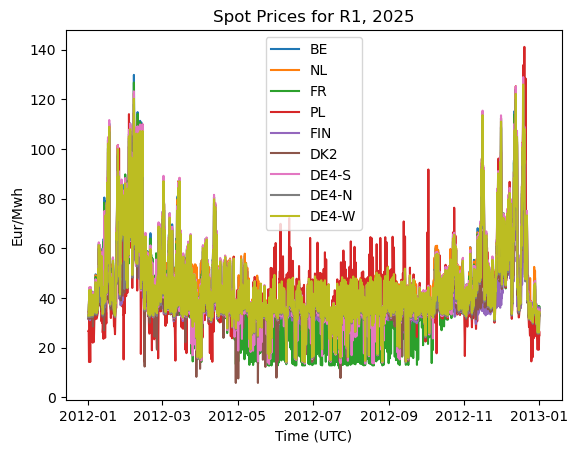

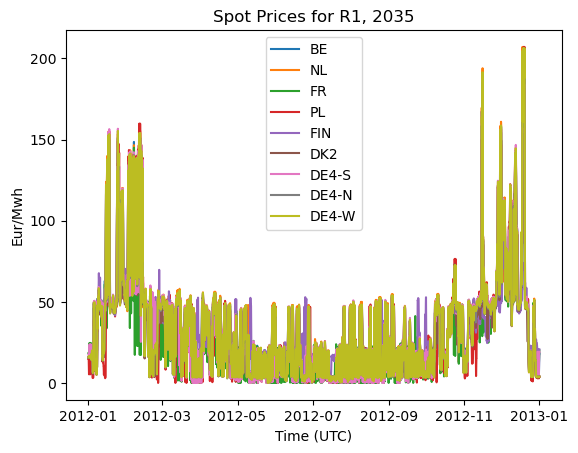

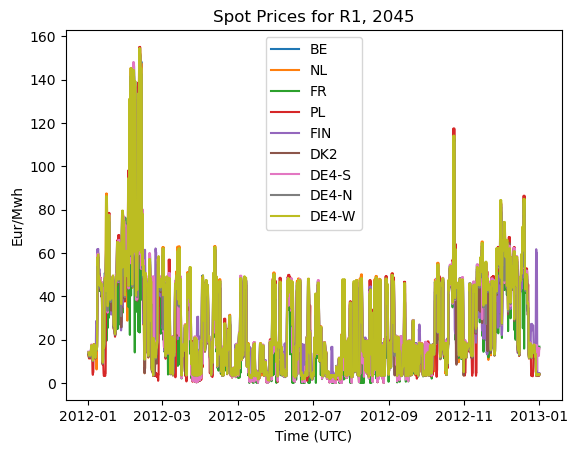

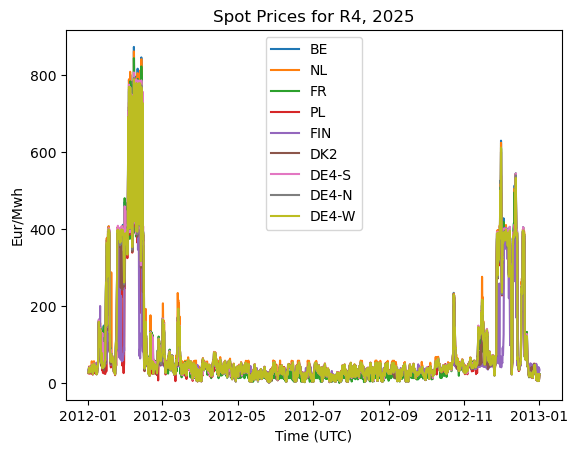

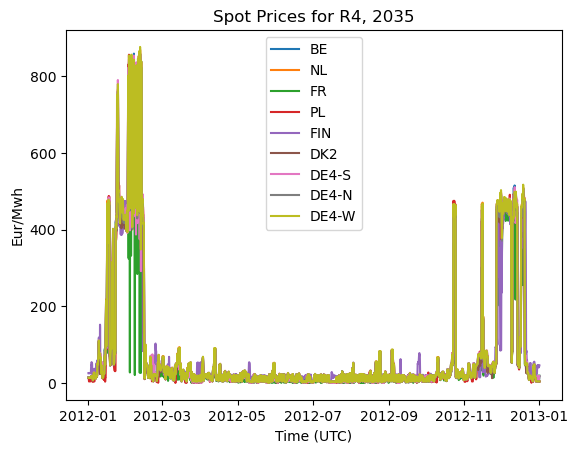

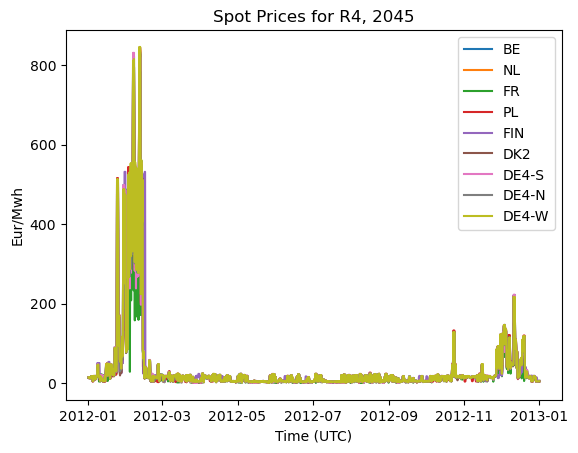

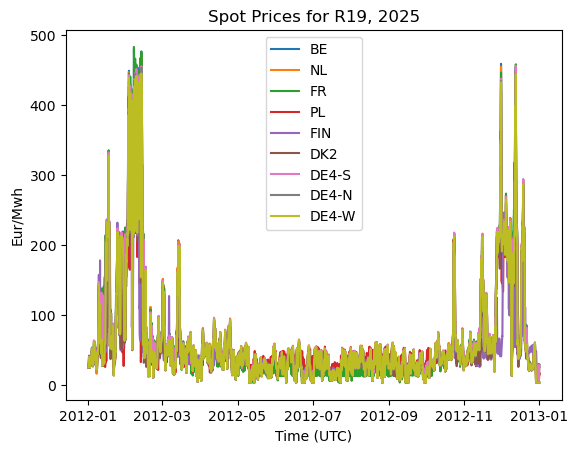

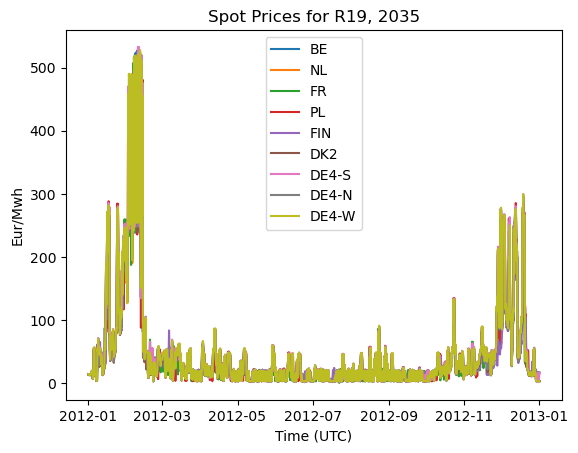

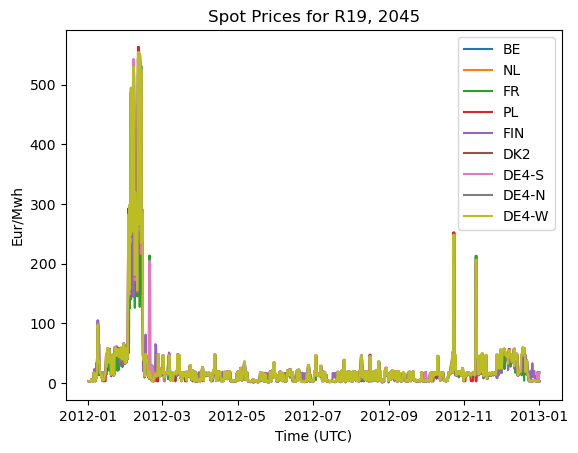

BE   DE4-E   DE4-N   DE4-S   DE4-W  \
         time                                                                
R1  2025 2012-01-01 00:00:00+00:00  33.821  27.578  32.141  33.559  32.744   
         2012-01-01 01:00:00+00:00  33.821  27.578  32.141  33.559  32.744   
         2012-01-01 02:00:00+00:00  33.821  27.578  32.141  33.559  32.744   
         2012-01-01 03:00:00+00:00  33.821  27.578  32.141  33.559  32.744   
         2012-01-01 04:00:00+00:00  33.821  27.578  32.141  33.559  32.744   
...                                    ...     ...     ...     ...     ...   
R19 2045 2012-12-31 19:00:00+00:00   3.145   3.097   3.086  17.441   3.144   
         2012-12-31 20:00:00+00:00   3.145   3.097   3.086  17.441   3.144   
         2012-12-31 21:00:00+00:00   3.145   3.097   3.086  17.441   3.144   
         2012-12-31 22:00:00+00:00   3.145   3.097   3.086  17.441   3.144   
         2012-12-31 23:00:00+00:00   3.145   3.097   3.086  17.441   3.144   

                                       DK1     DK2      EE     FIN      FR  \
         time                                                                
R1  2025 2012-01-01 00:00:00+00:00  32.158  31.558  31.247  30.639  32.685   
         2012-01-01 01:00:00+00:00  32.158  31.558  31.247  30.639  32.685   
         2012-01-01 02:00:00+00:00  32.158  31.558  31.247  30.639  32.685   
         2012-01-01 03:00:00+00:00  32.158  31.558  31.247  30.639  32.685   
         2012-01-01 04:00:00+00:00  32.158  31.558  32.025  32.661  32.685   
...                                    ...     ...     ...     ...     ...   
R19 2045 2012-12-31 19:00:00+00:00   3.038   3.055   2.874   3.071  18.242   
         2012-12-31 20:00:00+00:00   3.038   3.055   2.874   3.071  18.242   
         2012-12-31 21:00:00+00:00   3.038   3.055   2.874   3.071  18.242   
         2012-12-31 22:00:00+00:00   3.038   3.055   2.874   3.071  18.242   
         2012-12-31 23:00:00+00:00   3.038   3.055   2.874   3.071  18.242   

                                    ...     NO2     NO3     NO4     NO5  \
         time                       ...                                   
R1  2025 2012-01-01 00:00:00+00:00  ...  32.513  31.629  29.798  32.608   
         2012-01-01 01:00:00+00:00  ...  32.513  31.629  29.798  32.608   
         2012-01-01 02:00:00+00:00  ...  32.513  31.629  29.798  32.608   
         2012-01-01 03:00:00+00:00  ...  32.513  31.629  29.798  32.608   
         2012-01-01 04:00:00+00:00  ...  32.513  31.629  29.798  32.608   
...                                 ...     ...     ...     ...     ...   
R19 2045 2012-12-31 19:00:00+00:00  ...   3.005   3.005   3.032   3.041   
         2012-12-31 20:00:00+00:00  ...   3.005   3.005   3.032   3.041   
         2012-12-31 21:00:00+00:00  ...   3.005   3.005   3.032   3.041   
         2012-12-31 22:00:00+00:00  ...   3.005   3.005   3.032   3.041   
         2012-12-31 23:00:00+00:00  ...   3.005   3.005   3.032   3.041   

                                        PL     SE1     SE2     SE3     SE4  \
         time                                                                
R1  2025 2012-01-01 00:00:00+00:00  26.673  29.813  30.707  31.695  31.753   
         2012-01-01 01:00:00+00:00  26.673  29.813  30.707  31.695  31.753   
         2012-01-01 02:00:00+00:00  26.673  29.813  30.707  31.695  31.753   
         2012-01-01 03:00:00+00:00  26.673  29.813  30.707  31.695  31.753   
         2012-01-01 04:00:00+00:00  26.673  29.813  30.707  31.695  31.753   
...                                    ...     ...     ...     ...     ...   
R19 2045 2012-12-31 19:00:00+00:00   2.995   2.988   2.901   2.994   3.049   
         2012-12-31 20:00:00+00:00   2.995   2.988   2.901   2.994   3.049   
         2012-12-31 21:00:00+00:00   2.995   2.988   2.901   2.994   3.049   
         2012-12-31 22:00:00+00:00   2.995   2.988   2.901   2.994   3.049   
         2012-12-31 23:00:00+00:00   2.995   2.988   2.901   2.994   3.049   

                   

In [4]:
plot_prices(df_price, rolling=6)

In [5]:
# show data for 01-01-2025 from 2012-01-01 02:00:00 for multindex. access via xs
df_price.xs( slice('2012-01-01 00:00:00	', '2012-01-01 02:00:00	'), level=2, drop_level=False).head(20)

BE   DE4-E   DE4-N   DE4-S   DE4-W  \
         time                                                                
R1  2025 2012-01-01 00:00:00+00:00  33.821  27.578  32.141  33.559  32.744   
         2012-01-01 01:00:00+00:00  33.821  27.578  32.141  33.559  32.744   
         2012-01-01 02:00:00+00:00  33.821  27.578  32.141  33.559  32.744   
    2035 2012-01-01 00:00:00+00:00  16.044  15.398  15.605  17.569  15.700   
         2012-01-01 01:00:00+00:00  16.044  15.398  15.605  17.569  15.700   
         2012-01-01 02:00:00+00:00  16.044  15.398  15.605  17.569  15.700   
    2045 2012-01-01 00:00:00+00:00  13.787  13.817  13.544  14.440  14.089   
         2012-01-01 01:00:00+00:00  13.787  13.817  13.544  14.440  14.089   
         2012-01-01 02:00:00+00:00  13.787  13.817  13.544  14.440  14.089   
R4  2025 2012-01-01 00:00:00+00:00  28.180  26.999  27.544  28.214  27.529   
         2012-01-01 01:00:00+00:00  28.180  26.999  27.544  28.214  27.529   
         2012-01-01 02:00:00+00:00  28.180  26.999  27.544  28.214  27.529   
    2035 2012-01-01 00:00:00+00:00  13.816  13.260  13.633  13.857  13.520   
         2012-01-01 01:00:00+00:00  13.816  13.260  13.633  13.857  13.520   
         2012-01-01 02:00:00+00:00  13.816  13.260  13.633  13.857  13.520   
    2045 2012-01-01 00:00:00+00:00  13.626  13.873  13.668  14.271  13.924   
         2012-01-01 01:00:00+00:00  13.626  13.873  13.668  14.271  13.924   
         2012-01-01 02:00:00+00:00  13.626  13.873  13.668  14.271  13.924   
R19 2025 2012-01-01 00:00:00+00:00  25.518  25.462  24.512  26.192  24.972   
         2012-01-01 01:00:00+00:00  25.518  25.462  24.512  26.192  24.972   

                                       DK1     DK2      EE     FIN      FR  \
         time                                                                
R1  2025 2012-01-01 00:00:00+00:00  32.158  31.558  31.247  30.639  32.685   
         2012-01-01 01:00:00+00:00  32.158  31.558  31.247  30.639  32.685   
         2012-01-01 02:00:00+00:00  32.158  31.558  31.247  30.639  32.685   
    2035 2012-01-01 00:00:00+00:00  15.592  15.392  14.614  15.666  18.376   
         2012-01-01 01:00:00+00:00  15.592  15.392  14.614  15.666  18.376   
         2012-01-01 02:00:00+00:00  15.592  15.392  14.614  15.666  18.376   
    2045 2012-01-01 00:00:00+00:00   6.324  13.298  13.439  14.196  14.270   
         2012-01-01 01:00:00+00:00   6.324  13.298  13.439  14.196  14.270   
         2012-01-01 02:00:00+00:00   6.324  13.298  13.439  14.196  14.270   
R4  2025 2012-01-01 00:00:00+00:00  28.134  28.012  27.213  30.557  28.567   
         2012-01-01 01:00:00+00:00  28.134  28.012  27.213  30.557  28.567   
         2012-01-01 02:00:00+00:00  28.134  28.012  27.213  30.557  28.567   
    2035 2012-01-01 00:00:00+00:00  13.514  13.386  12.945  25.379  14.193   
         2012-01-01 01:00:00+00:00  13.514  13.403  12.574  25.379  14.193   
         2012-01-01 02:00:00+00:00  13.458  13.386  12.574  25.379  14.193   
    2045 2012-01-01 00:00:00+00:00  13.242  13.314  12.875  14.260  14.100   
         2012-01-01 01:00:00+00:00  13.293  13.365  12.875  14.260  14.100   
         2012-01-01 02:00:00+00:00  13.242  13.314  12.875  14.260  14.100   
R19 2025 2012-01-01 00:00:00+00:00  24.715  25.189  25.018  26.227  27.394   
         2012-01-01 01:00:00+00:00  24.715  25.189  25.018  26.227  27.394   

                                    ...     NO2     NO3     NO4     NO5  \
         time                       ...                                   
R1  2025 2012-01-01 00:00:00+00:00  ...  32.513  31.629  29.798  32.608   
         2012-01-01 01:00:00+00:00  ...  32.513  31.629  29.798  32.608   
         2012-01-01 02:00:00+00:00  ...  32.513  31.629  29.798  32.608   
    2035 2012-01-01 00:00:00+00:00  ...  15.332  15.947  15.023  15.733   
         2012-01-01 01:00:00+00:00  ...  15.332  15.947  15.023  15.733   
         2012-01-01 02:00:00+00:00  ...  15.332  15.947  15.023  15.733   
    20

### mapping the price to location, this will lead to duplication of some columns and droping some others in the price table

In [6]:
# #this defines a mapping from the location to the pricing zone
# needs to match the column names exactly
MAP_LOC_TO_PRICINGZONE = {
    'LOC_1': 'DE4-S', 'LOC_2': 'DE4-N', 'LOC_3': 'PL', 'LOC_4_1': 'FIN', 'LOC_5.1': 'NL', 'LOC_6': 'BE', 'LOC_7': 'DK2', 'LOC_8.1': 'DK2', 'LOC_9': 'DE4-S', 'LOC_10': 'PL'	
}
for key, value in MAP_LOC_TO_PRICINGZONE.items():
    df_price[key] = df_price[value]
df_price = df_price.filter(regex='LOC_')

In [7]:
df_price.head()

LOC_1   LOC_2   LOC_3  LOC_4_1  LOC_5.1  \
        time                                                                  
R1 2025 2012-01-01 00:00:00+00:00  33.559  32.141  26.673   30.639    34.28   
        2012-01-01 01:00:00+00:00  33.559  32.141  26.673   30.639    34.28   
        2012-01-01 02:00:00+00:00  33.559  32.141  26.673   30.639    34.28   
        2012-01-01 03:00:00+00:00  33.559  32.141  26.673   30.639    34.28   
        2012-01-01 04:00:00+00:00  33.559  32.141  26.673   32.661    34.28   

                                    LOC_6   LOC_7  LOC_8.1   LOC_9  LOC_10  
        time                                                                
R1 2025 2012-01-01 00:00:00+00:00  33.821  31.558   31.558  33.559  26.673  
        2012-01-01 01:00:00+00:00  33.821  31.558   31.558  33.559  26.673  
        2012-01-01 02:00:00+00:00  33.821  31.558   31.558  33.559  26.673  
        2012-01-01 03:00:00+00:00  33.821  31.558   31.558  33.559  26.673  
        2012-01-01 04:00:00+00:00  33.821  31.558   31.558  33.559  26.673

# Calculating revenue

In [26]:
def generate_production_prices(df_price: pd.DataFrame, df_production: pd.DataFrame, production_year=None, assume_price_year=2025, assume_price_sheet="R1"):
    df_production = df_production.copy()
    df_price = df_price.copy()
    if production_year is not None:
        df_production = df_production [df_production.index.year == production_year]
        
    df_price_relevant = df_price.xs(str(assume_price_year), level=1, drop_level=True).xs(assume_price_sheet, level=0, drop_level=True)
    # now pretending  df_price_relevant is replicated for each year of df_production_relevant
    df_prices_relevant = []
    for year in list(df_production.index.year.unique()):
        df_price_relevant_t = df_price_relevant.copy()
        df_price_relevant_t.index = df_price_relevant_t.index + pd.offsets.DateOffset(years=year - 2012)
        df_prices_relevant.append(df_price_relevant_t)
    df_prices_replicated = pd.concat(df_prices_relevant)
    
    return df_prices_replicated, df_production

def get_production(df_price: pd.DataFrame, df_production: pd.DataFrame, production_year=None, assume_price_year=2025, assume_price_sheet="R1"):
    """returns a dataframe with the production multiplied by the prices.
    
    Args:
        df_price (pd.DataFrame): dataframe with the prices, the column names need to be the location
        df_production (pd.DataFrame): dataframe with the production, the column names need to be the location+
        """
    df_prices_replicated, df_production_selected = generate_production_prices(df_price, df_production, production_year, assume_price_year, assume_price_sheet)
    multiplied = df_production_replicated.multiply(df_prices_replicated, level=1)
    
    # multiplied contains now a 
    return multiplied


In [32]:
revenue_scenario_r1_2025 = get_production(df_price, df_production, production_year=None, assume_price_year=2025, assume_price_sheet="R1")

In [59]:
slices_t = slice("2012-05-01 08:00:00+00:00","2012-05-01 10:00:00+00:00")
revenue_scenario_r1.loc[slices_t][('P_100',   'LOC_1')] #, df_price.loc[slices].xs('R1', level=0, drop_level=True).xs('2025', level=0, drop_level=True)

time
2012-05-01 08:00:00+00:00    5.456468
2012-05-01 09:00:00+00:00    2.843936
2012-05-01 10:00:00+00:00    0.136344
Name: (P_100, LOC_1), dtype: float64

In [66]:
df_prices_replicated.loc[slices_t, 'LOC_1'], df_production_replicated.loc[slices_t, ('P_100',   'LOC_1')], df_prices_replicated.loc[slices_t, 'LOC_1'] * df_production_replicated.loc[slices_t, ('P_100',   'LOC_1')]

(time
 2012-05-01 08:00:00+00:00    28.025
 2012-05-01 09:00:00+00:00    16.214
 2012-05-01 10:00:00+00:00    14.820
 Name: LOC_1, dtype: float64,
 time
 2012-05-01 08:00:00+00:00    0.1947
 2012-05-01 09:00:00+00:00    0.1754
 2012-05-01 10:00:00+00:00    0.0092
 Name: (P_100, LOC_1), dtype: float64,
 time
 2012-05-01 08:00:00+00:00    5.456468
 2012-05-01 09:00:00+00:00    2.843936
 2012-05-01 10:00:00+00:00    0.136344
 dtype: float64)